In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# Import the datetime module from the datetime library.
from datetime import datetime

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2045ca032793d4b29b3dd67358c2395d


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

591

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | palana
Processing Record 2 of Set 12 | erzin
Processing Record 3 of Set 12 | busselton
Processing Record 4 of Set 12 | butaritari
Processing Record 5 of Set 12 | bogale
Processing Record 6 of Set 12 | kloulklubed
Processing Record 7 of Set 12 | rikitea
Processing Record 8 of Set 12 | berezovyy
Processing Record 9 of Set 12 | vila franca do campo
Processing Record 10 of Set 12 | mascote
Processing Record 11 of Set 12 | koroni
Processing Record 12 of Set 12 | san patricio
Processing Record 13 of Set 12 | la union
Processing Record 14 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 15 of Set 12 | acapulco
Processing Record 16 of Set 12 | victoria
Processing Record 17 of Set 12 | kapaa
Processing Record 18 of Set 12 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 20 of Set 12 | mataura
Processi

Processing Record 33 of Set 15 | pailon
Processing Record 34 of Set 15 | gat
Processing Record 35 of Set 15 | kaitangata
Processing Record 36 of Set 15 | nome
Processing Record 37 of Set 15 | itoman
Processing Record 38 of Set 15 | chirilagua
Processing Record 39 of Set 15 | umzimvubu
City not found. Skipping...
Processing Record 40 of Set 15 | naron
Processing Record 41 of Set 15 | mount gambier
Processing Record 42 of Set 15 | jamestown
Processing Record 43 of Set 15 | jalu
Processing Record 44 of Set 15 | avera
Processing Record 45 of Set 15 | virginia beach
Processing Record 46 of Set 15 | srednekolymsk
Processing Record 47 of Set 15 | kodiak
Processing Record 48 of Set 15 | troitsko-pechorsk
Processing Record 49 of Set 15 | okhotsk
Processing Record 50 of Set 15 | yermakovskoye
Processing Record 1 of Set 16 | tarpon springs
Processing Record 2 of Set 16 | leningradskiy
Processing Record 3 of Set 16 | shinjo
Processing Record 4 of Set 16 | barentsburg
City not found. Skipping...
Pr

Processing Record 18 of Set 19 | mlonggo
Processing Record 19 of Set 19 | tekeli
Processing Record 20 of Set 19 | geraldton
Processing Record 21 of Set 19 | chor
Processing Record 22 of Set 19 | suffolk
Processing Record 23 of Set 19 | santa maria
Processing Record 24 of Set 19 | ilhabela
Processing Record 25 of Set 19 | scottsburgh
City not found. Skipping...
Processing Record 26 of Set 19 | zhenlai
Processing Record 27 of Set 19 | monterey
Processing Record 28 of Set 19 | marv dasht
City not found. Skipping...
Processing Record 29 of Set 19 | statesville
Processing Record 30 of Set 19 | lawan kuda baharu
City not found. Skipping...
Processing Record 31 of Set 19 | cabo san lucas
Processing Record 32 of Set 19 | tlahualilo
City not found. Skipping...
Processing Record 33 of Set 19 | malanville
Processing Record 34 of Set 19 | okha
Processing Record 35 of Set 19 | gulshat
City not found. Skipping...
Processing Record 36 of Set 19 | wad madani
Processing Record 37 of Set 19 | klyuchi
Pr

Processing Record 3 of Set 23 | mamou
Processing Record 4 of Set 23 | konevo
Processing Record 5 of Set 23 | soro
Processing Record 6 of Set 23 | mahdasht
Processing Record 7 of Set 23 | porto novo
Processing Record 8 of Set 23 | pichayevo
Processing Record 9 of Set 23 | ust-maya
Processing Record 10 of Set 23 | tanete
Processing Record 11 of Set 23 | ndjole
Processing Record 12 of Set 23 | natal
Processing Record 13 of Set 23 | lorengau
Processing Record 14 of Set 23 | yar-sale
Processing Record 15 of Set 23 | lata
Processing Record 16 of Set 23 | santa isabel do rio negro
Processing Record 17 of Set 23 | puerto colombia
Processing Record 18 of Set 23 | sagae
Processing Record 19 of Set 23 | pietersburg
Processing Record 20 of Set 23 | juneau
Processing Record 21 of Set 23 | kishni
Processing Record 22 of Set 23 | hami
Processing Record 23 of Set 23 | saleaula
City not found. Skipping...
Processing Record 24 of Set 23 | gorno-chuyskiy
City not found. Skipping...
Processing Record 25 o

In [7]:
len(city_data)

543

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Palana,59.1167,159.9667,40.50,51,95,16.71,RU,2021-09-09 01:34:38
1,Erzin,36.9559,36.2000,81.32,85,9,1.21,TR,2021-09-09 01:34:38
2,Busselton,-33.6500,115.3333,53.04,88,100,4.25,AU,2021-09-09 01:34:38
3,Butaritari,3.0707,172.7902,84.02,69,20,13.58,KI,2021-09-09 01:34:39
4,Bogale,16.2833,95.4000,82.08,84,90,8.25,MM,2021-09-09 01:34:39
5,Kloulklubed,7.0419,134.2556,82.90,71,100,11.74,PW,2021-09-09 01:34:39
6,Rikitea,-23.1203,-134.9692,74.05,78,96,17.45,PF,2021-09-09 01:34:39
7,Berezovyy,51.6667,135.7000,67.30,67,84,4.43,RU,2021-09-09 01:34:40
8,Vila Franca Do Campo,37.7167,-25.4333,72.01,87,9,3.09,PT,2021-09-09 01:34:40
9,Mascote,-15.5631,-39.3025,66.87,99,12,1.57,BR,2021-09-09 01:34:40


In [9]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Palana,RU,2021-09-09 01:34:38,59.1167,159.9667,40.50,51,95,16.71
1,Erzin,TR,2021-09-09 01:34:38,36.9559,36.2000,81.32,85,9,1.21
2,Busselton,AU,2021-09-09 01:34:38,-33.6500,115.3333,53.04,88,100,4.25
3,Butaritari,KI,2021-09-09 01:34:39,3.0707,172.7902,84.02,69,20,13.58
4,Bogale,MM,2021-09-09 01:34:39,16.2833,95.4000,82.08,84,90,8.25
5,Kloulklubed,PW,2021-09-09 01:34:39,7.0419,134.2556,82.90,71,100,11.74
6,Rikitea,PF,2021-09-09 01:34:39,-23.1203,-134.9692,74.05,78,96,17.45
7,Berezovyy,RU,2021-09-09 01:34:40,51.6667,135.7000,67.30,67,84,4.43
8,Vila Franca Do Campo,PT,2021-09-09 01:34:40,37.7167,-25.4333,72.01,87,9,3.09
9,Mascote,BR,2021-09-09 01:34:40,-15.5631,-39.3025,66.87,99,12,1.57


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

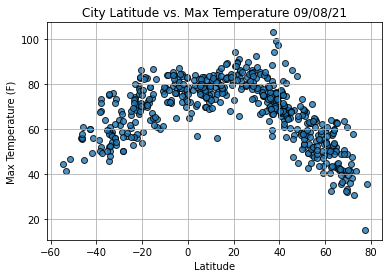

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

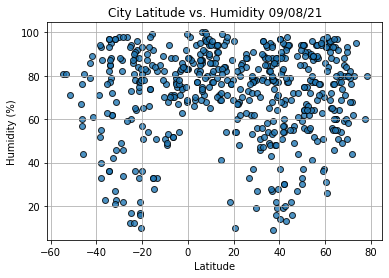

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

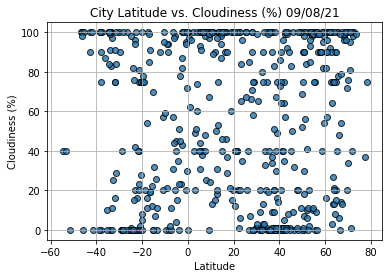

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

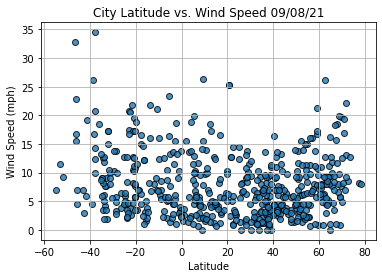

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()